In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generic LCG Implementation

The most generic form of LCG is defined by the following recurrence relation:

$$
X_{n+1} = (aX_n + c) \mod m
$$

It is implemented in python below, also along with a few functions that will help us in our analysis.

In [2]:
def lcg_gen(seed, a=1103515245, c=12345, m=2**31-1):
    num = (a*seed + c) % m
    return num

def lcg_gen_list(seed, a=1103515245, c=12345, m=2**31-1, n=10):
    num = seed
    nums = []
    for i in range(n):
        num = lcg_gen(num, a, c, m)
        nums.append(num)
    return nums

def lcg_gen_list_plot(seed, a=1103515245, c=12345, m=2**31-1, n=10):
    nums = lcg_gen_list(seed, a, c, m, n)
    plt.plot(nums)
    plt.show()

In [3]:
# Different Seeds give different sequences

print(lcg_gen_list(123, n=3))
print(lcg_gen_list(42, n=3))
print(lcg_gen_list(10, n=3))

[440917719, 357222964, 2107447239]
[1250496048, 1310387594, 1622543901]
[297746560, 1077167153, 317467111]


Plot the distribution of this generator

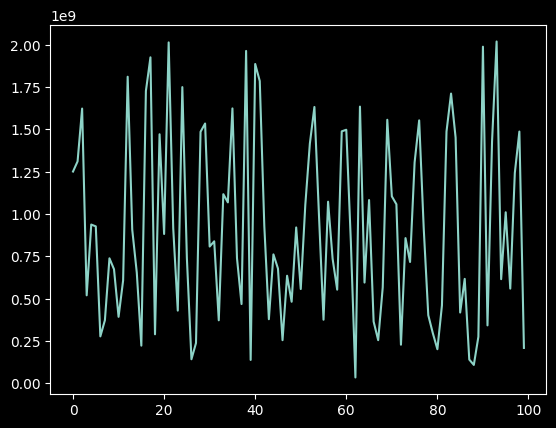

In [4]:
lcg_gen_list_plot(42, n=100)

As you can see, it is looking quite random, however, I did not take actual generic values. I took the values that are used in the C++ standard library. This is because I wanted to show how the LCG works. If I had taken generic values, the output probably would have been a lot less random.

The values of a for example is takes because it is one less than a prime number. This is because if a is a prime number, the period of the LCG is m - 1. This is because of a theorem called Fermat's Little Theorem. The values of m and a are chosen because they are large prime numbers and they produce a period of 2^31.

# Lehmer Random Number Generator

Lehmer Random Number Generator is a special case of LCG.
It follows the following recurrence relation:

$$
X_{n+1} = (aX_n) \mod m
$$

Here, usually, the values are `m=2^31` and `a=7^5`.
These values are chosen because they are large prime numbers and they produce a period of `2^31`.

Hence, we can modify the `LCG` functions to implement the `Lehmer Random Number Generator`.

## LCG Class

However, before we proceed, let's create a class for LCG. This class will be used to create objects of LCG. Each object will have it's own state and hence, it's own sequence of random numbers.

In [5]:
class LCG:
    def __init__(self, seed, a=1103515245, c=12345, m=2**31, n=100):
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m
        self.n = n
        self.state = seed

    def next(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state

    def get_num(self):
        return self.next()

    def get_list(self):
        return [self.get_num() for _ in range(self.n)]

    def get_df(self):
        return pd.DataFrame(self.get_list(), columns=['random_number'])

    def get_hist(self):
        return self.get_df().hist()

    def get_stats(self):
        return self.get_df().describe()

    def plot(self):
        plt.figure(figsize=(16, 8))
        plt.plot(self.get_list())
        plt.show()


In [6]:
lehmer = LCG(42, n=100)

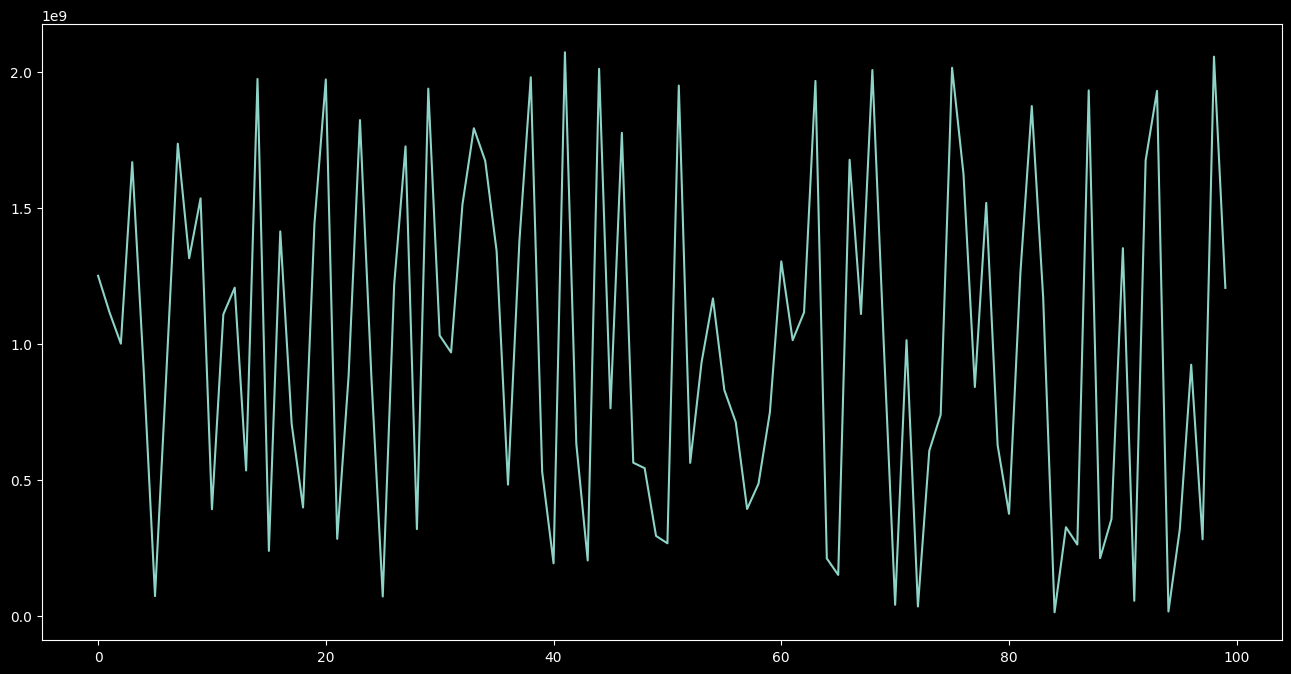

In [7]:
lehmer.plot()

The Lehmer Random Number Generator gives us a slightly better randomness than just
normal LCG because the Increment is 0. However, it is still not good enough for
most applications.

Small Function to calculate the period of a LCG

In [8]:
def cal_period(lcg: list[int]):
    period = 0
    for i in range(1, len(lcg)):
        if lcg[i] == lcg[0]:
            period = i
            break
    return period

In [19]:
lcg = LCG(a=123, c=456, m=789, seed=42, n=2**10)
print(cal_period(lcg.get_list()))

262
